In [3]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import glob
import pandas as pd

from evcouplings.couplings import read_raw_ec_file
from evcouplings.compare import (
    PDB, DistanceMap, SIFTS, intra_dists,
    multimer_dists, coupling_scores_compared
)

from evcouplings.visualize import plot_contact_map, plot_context
from evcouplings.visualize.pairs import plot_pairs, scale
direc = '/home/as974/ada'
#direc = '/Users/adashaw/Dropbox (Harvard University)/Debbie-Ada'

def scale_01(a):
    return (a - np.min(a))/np.ptp(a)
def plot_top_n(z,n,mod = 'corrected'):
    z[z<np.sort(z.flatten())[::-1][n-1]] = 0
    zscal = scale_01(z)
    if mod == 'corrected':
        zscal[np.triu_indices(len(zscal))] = 0
        for r in range(len(z)):
            for c in range(len(z)):
                plt.scatter(r,c,s=zscal[r,c]*100,c='g')
    else:
        zscal[np.tril_indices(len(zscal))] = 0
        for r in range(len(z)):
            for c in range(len(z)):
                plt.scatter(r,c,s=zscal[r,c]*100,c='r')
    plt.axis('square')
    plt.axis([-1,len(zscal),-1,len(zscal)])
    plt.gca().invert_xaxis()

def plot_top_n_contacts(df,weights=None):
    for index,row in df.nlargest(100,'apc').iterrows():
        if weights != None:
            plt.scatter(row.i,row.j,s=row.apc*40,c='g')
        else:
            plt.scatter(row.j,row.i,s=row.apc*40,c='r')
    plt.axis('square')

In [4]:
s = SIFTS("/n/groups/marks/databases/SIFTS/pdb_chain_uniprot_plus_current.o2.csv", "/n/groups/marks/databases/SIFTS/pdb_chain_uniprot_plus_current.o2.fasta")

In [5]:
selected_structures = s.by_pdb_id("4faz")
selected_structures.hits

distmap_intra = intra_dists(selected_structures)
distmap_multimer = multimer_dists(selected_structures)

STYLE_CONTACT = {
    "edgecolor": "none",
    "c": "#b6d4e9",
    "s": 100,
}
scale_func = lambda x: x#scale(x, ax=None)
file1 = pd.read_csv('pd_mtx.csv')
file2 = pd.read_csv('pd_mtx_weights.csv')

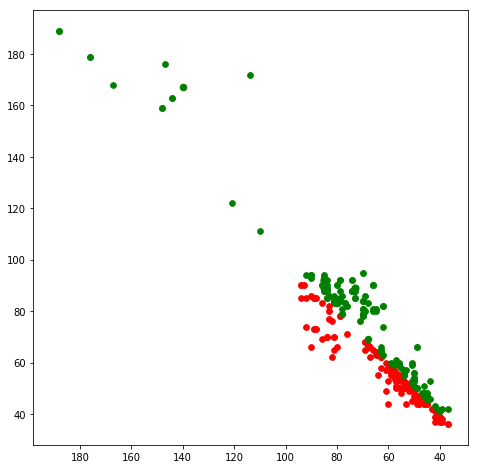

In [6]:
plt.figure(figsize=[8,8])
#plot_pairs(distmap_intra.contacts(),symmetric=False, style=scale_func(STYLE_CONTACT))
plot_top_n_contacts(file1)
plot_top_n_contacts(file2,weights=True)
plt.gca().invert_xaxis()
# red = mlines.Line2D([], [], color='r', marker='o', linestyle='None', markersize=10, label='uncorrected')
# green = mlines.Line2D([], [], color='g', marker='o', linestyle='None', markersize=10, label='corrected')
# plt.legend(handles=[red,green],loc='lower left',frameon=False)